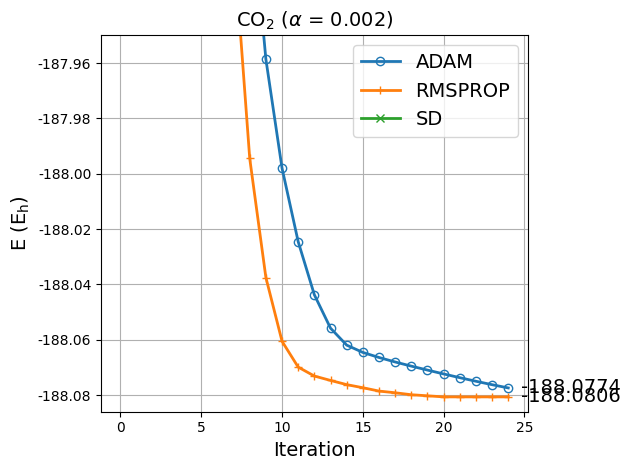

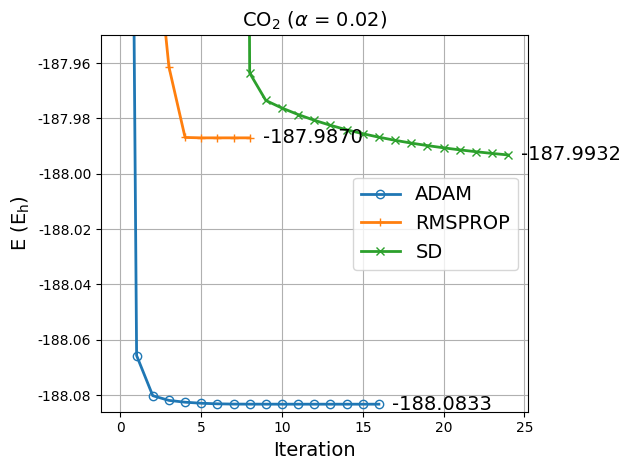

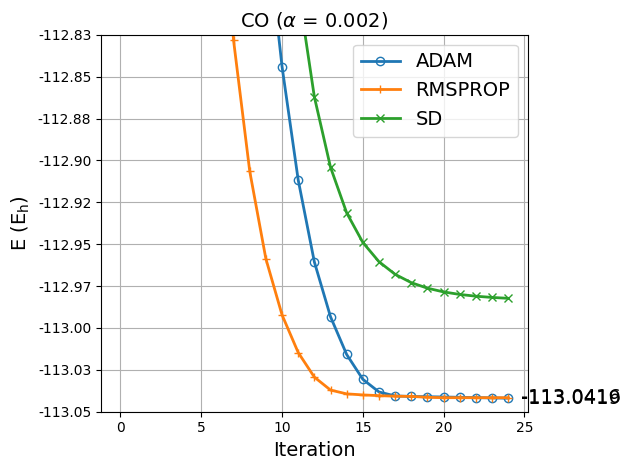

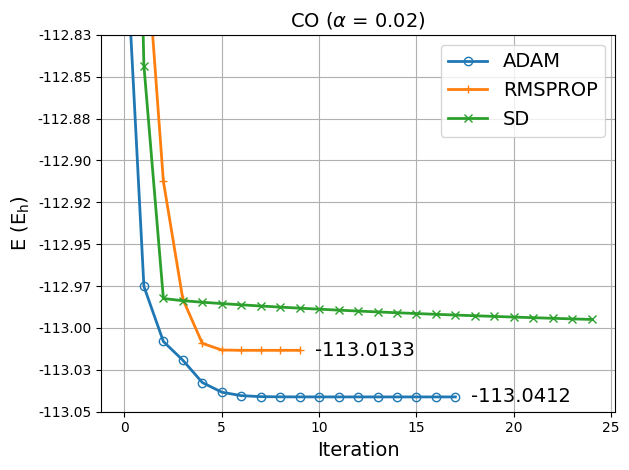

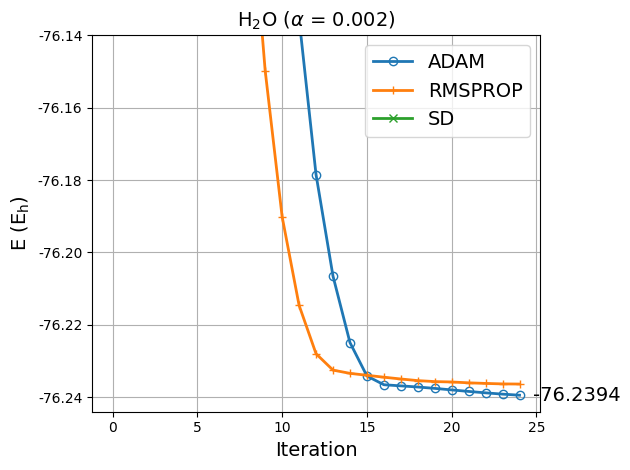

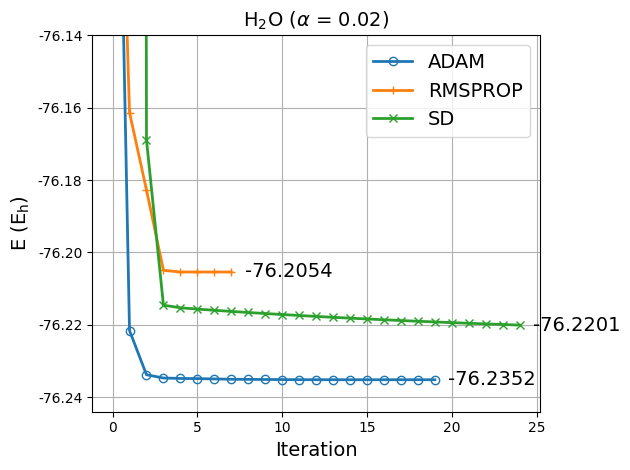

In [2]:
#This notebook plots the CO, CO2 and H2O convergence plots for different selected alphas
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from collections import defaultdict
import re

def format_molecule(name: str) -> str:
    # Sustitutes numbers by subindixes in LaTeX for molecule naming
    # ie H2O to H_2O
    return re.sub(r'(\d+)', r'$_{\1}$', name)

alpha_list = [ "0.002","0.02"]
molecule_list = ["CO2", "CO", "H2O"]

for molecule in molecule_list:
    for alpha in alpha_list:
        title_str = format_molecule(molecule)

        # Read the data
        data = defaultdict(list)  # alpha: list of (iteration, energy)

        with open(f"{molecule}_{alpha}.csv", mode='r') as file:
            reader = csv.DictReader(file)
            for row in reader:
                alg = row['alg']
                iteration = int(row['iteration'])
                energy = float(row['energy'])
                data[alg].append((iteration, energy))

        # Plot
        markers = ['o', '+', 'x', '^', 'x', 'o', '+']

        if molecule == "CO":
            # Zoom on y axis for CO
            plt.ylim(-113.05, -112.825) #  Range: 125 kcal approx, alpha = 0.02 and 0.002 
            if alpha == "0.02":
                alg_to_show = ("RMSPROP", "ADAM", "ADAGRAD")
            elif alpha == "0.002":
                alg_to_show = ("ADAM","RMSPROP")
        elif molecule == "CO2":
            # Zoom for CO2
            plt.ylim(-188.086, -187.95) # Range around 150 kcal 
            if alpha == "0.02":
                alg_to_show = ("SD", "RMSPROP", "ADAM", "ADAGRAD")
            elif alpha == "0.002":
                alg_to_show = ("RMSPROP", "ADAM")
        elif molecule == "H2O":
            plt.ylim(-76.244, -76.14) # Range: 40 kcal approx
            if alpha == "0.02":
                alg_to_show = ("SD", "RMSPROP", "ADAM","ADAGRAD")
            elif alpha == "0.002":
                alg_to_show = ("Null", "ADAM")

        # Plot the first 130 points of the corresponding csv file
        for i, (alg, points) in enumerate(sorted(data.items())):
            # Get thw first 130 iterations
            points = points[:129]  # <-- Selección parcial
            iterations, energies = zip(*points)
            marker = markers[i % len(markers)]
            plt.plot(iterations, energies, marker=marker, markerfacecolor='none', linewidth=2,label=f'{alg}')

        #### Plot the last energy values of the selected algorithm (alg_to_show)
            if alg in alg_to_show:
                last_x = iterations[-1]
                last_y = energies[-1]
                plt.text(last_x + 0.8, last_y, f'{last_y:.4f}', fontsize=14, verticalalignment='center')

        plt.xlabel('Iteration', fontsize=14)
        plt.title(f'{title_str} ($\\alpha$ = {alpha})', fontsize=14)

        plt.ylabel(r'E (E$_{\mathrm{h}}$)', fontsize=14)  # recta
  
        plt.legend(fontsize=14)
            
        plt.grid(True)
        plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.2f}"))
        plt.tight_layout()
        plt.savefig(f"{molecule}_{alpha}_{"zoom"}.png", dpi=300)
        plt.show()
